# Can we predict the possibility of a booking?
*Source: https://www.kaggle.com/jessemostipak/hotel-booking-demand#hotel_bookings.csv*

#### Task Details
Can we predict the possibility of a booking for a hotel based on the previous_cancellation as the target?

#### Expected Submission
Two columns --> Hotel Name and Booking_Possibility (0 or 1)

## Standard Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the data

In [2]:
df = pd.read_csv('hotel_bookings.csv')

## Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.size

3820480

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


## Exploratory Data Analysis, EDA

In [9]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
cat = df.select_dtypes(include='object').columns
cat

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [11]:
df = df.drop(['agent','company','reservation_status_date'],axis=1)

In [12]:
df['country'].mode()

0    PRT
dtype: object

In [13]:
df['country'] = df['country'].replace(np.nan, 'PRT')

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
print(df.children.unique())
print('\n')
print(df.children.mode())

[ 0.  1.  2. 10.  3. nan]


0    0.0
dtype: float64


In [16]:
df['children'] = df['children'].replace(np.nan, 0)

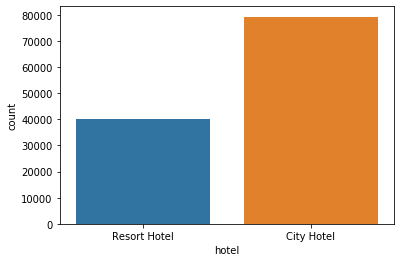

In [17]:
sns.countplot(df.hotel)

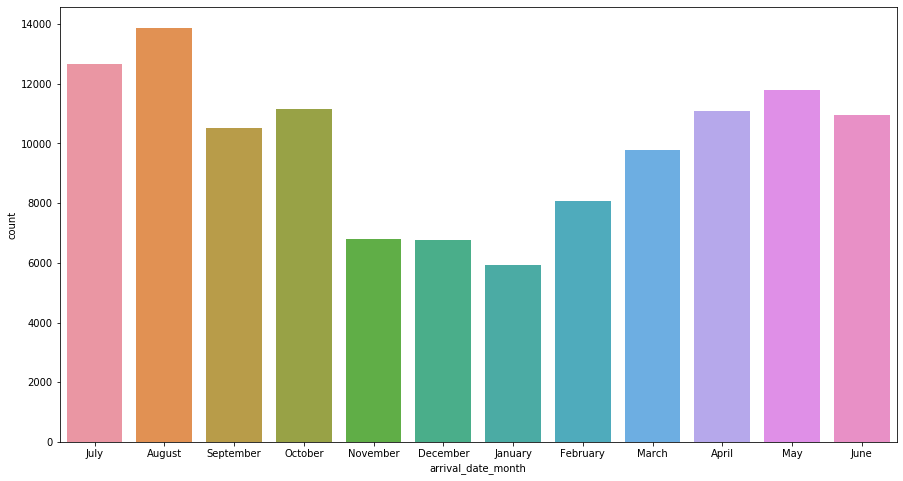

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(df.arrival_date_month)

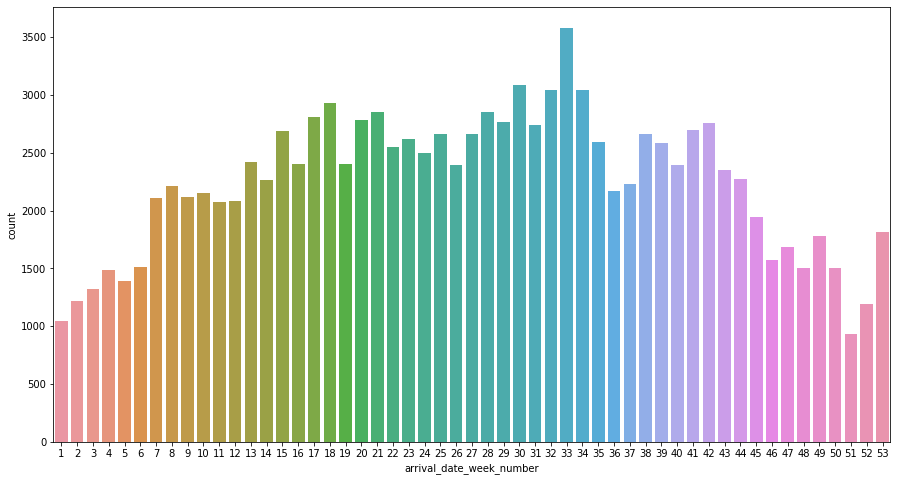

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(df.arrival_date_week_number)

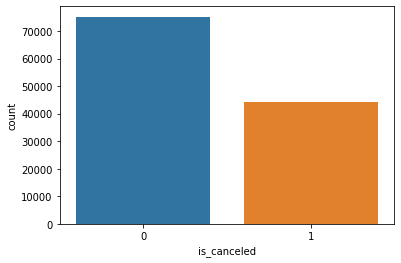

In [20]:
sns.countplot(df.is_canceled)

In [21]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

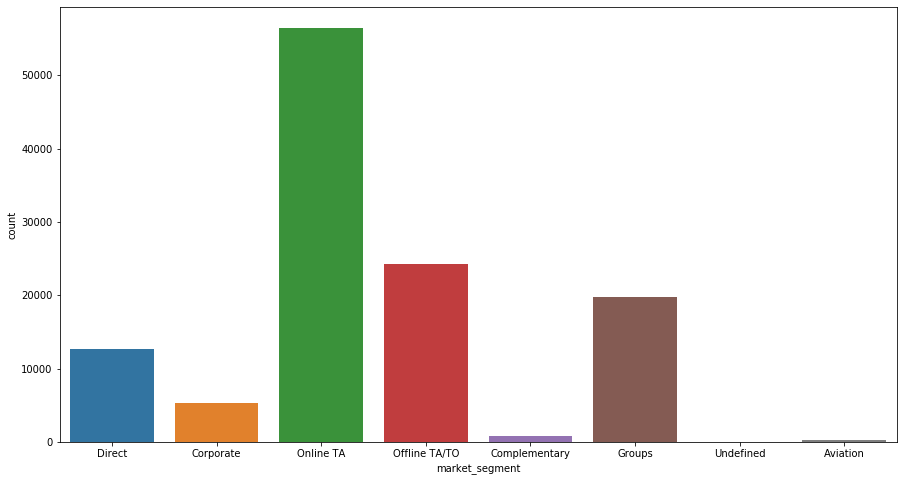

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(df.market_segment)

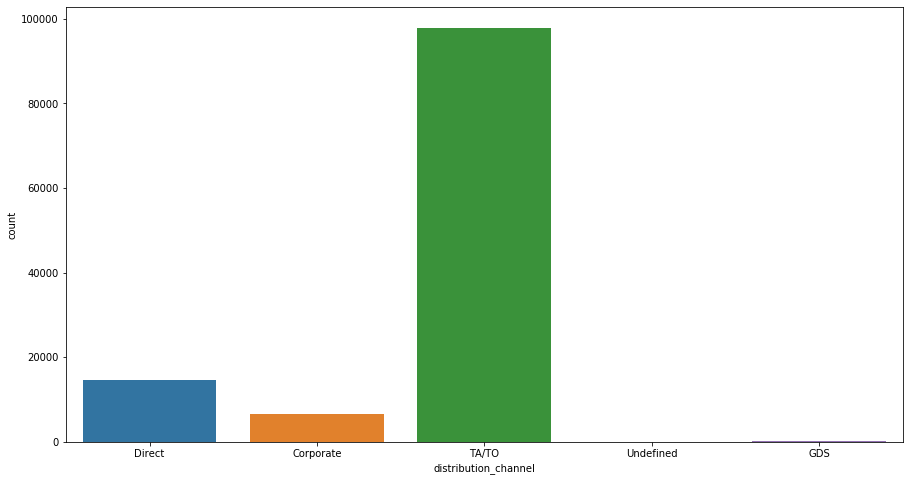

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(df.distribution_channel)

### What else can we explore?

In [24]:
cat_list = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',]
print("check out the following functions:")
for i in cat_list:
    print("plt.figure(figsize=(15,4))")
    print("sns.countplot(df[%s])" %i)
    print("\n")

check out the following functions:
plt.figure(figsize=(15,4))
sns.countplot(df[hotel])


plt.figure(figsize=(15,4))
sns.countplot(df[arrival_date_month])


plt.figure(figsize=(15,4))
sns.countplot(df[meal])


plt.figure(figsize=(15,4))
sns.countplot(df[market_segment])


plt.figure(figsize=(15,4))
sns.countplot(df[distribution_channel])


plt.figure(figsize=(15,4))
sns.countplot(df[reserved_room_type])


plt.figure(figsize=(15,4))
sns.countplot(df[assigned_room_type])


plt.figure(figsize=(15,4))
sns.countplot(df[deposit_type])


plt.figure(figsize=(15,4))
sns.countplot(df[customer_type])


plt.figure(figsize=(15,4))
sns.countplot(df[reservation_status])




In [25]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


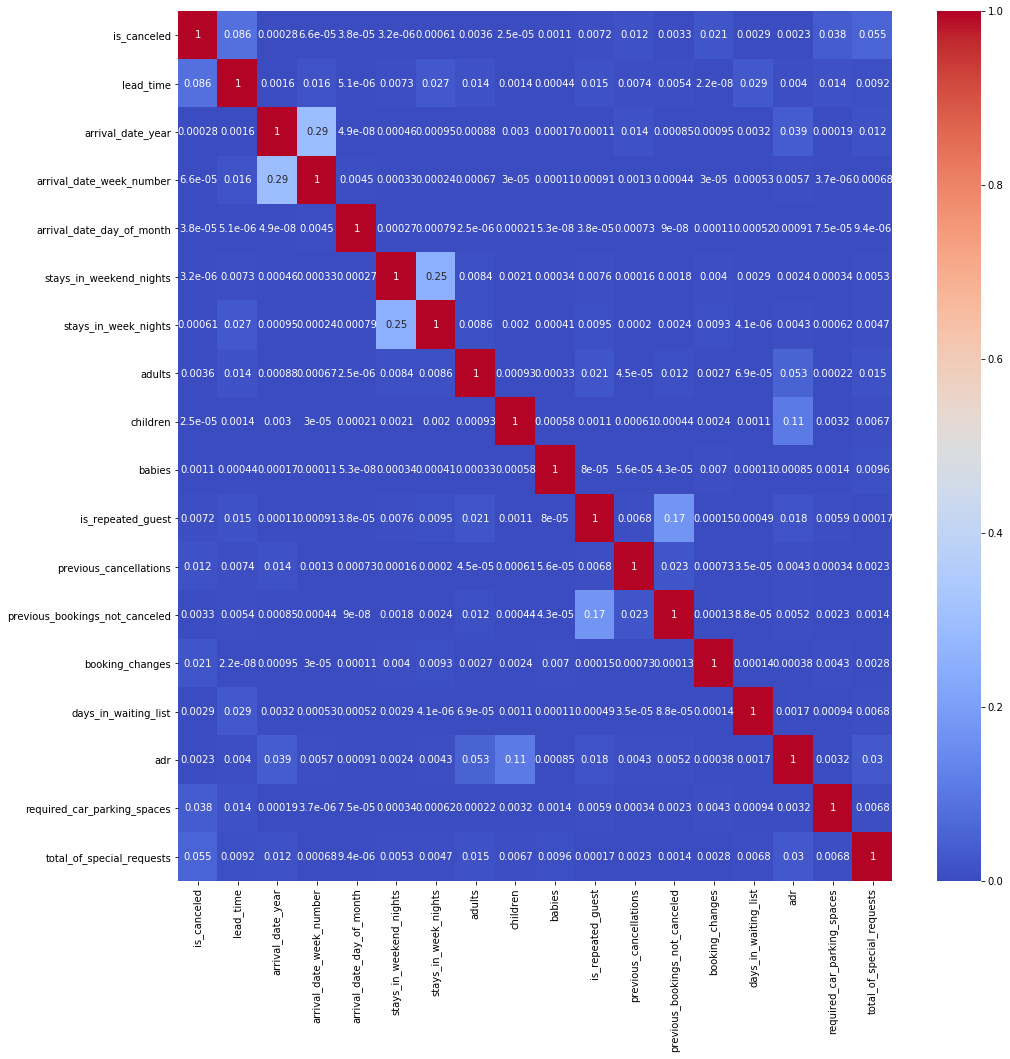

In [26]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr()**2, annot=True, cmap='coolwarm', vmin=0, vmax=1.0)

## Train Model
#### Covert Categorical Data to Numerical Data using Dummies

In [27]:
cat = df.select_dtypes(include='object').columns
cat

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [28]:
df = pd.get_dummies(df, prefix=cat, drop_first=True)

In [29]:
df.shape

(119390, 248)

In [30]:
col_names = df.columns
print(col_names)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies',
       ...
       'assigned_room_type_K', 'assigned_room_type_L', 'assigned_room_type_P',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Check-Out',
       'reservation_status_No-Show'],
      dtype='object', length=248)


#### Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
X = df.drop('is_canceled',axis=1)
Y = df['is_canceled']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [34]:
LogReg = LogisticRegression()

In [35]:
LogReg.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = LogReg.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[22426,   200],
       [  396, 12795]])

In [38]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.983359857051121

## I have no idea what I'm doing here
#### on OLS
reference: https://www.kaggle.com/swapnilwagh061993/house-booking

In [39]:
import statsmodels.api as sm
X1 = df.drop('is_canceled',axis=1 )
Y1 = df['is_canceled']

In [40]:
Xc=sm.add_constant(X1)
model=sm.OLS(Y1,X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            is_canceled   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.709e+09
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                        0.00
Time:                        17:43:41   Log-Likelihood:                      8.3612e+05
No. Observations:              119390   AIC:                                 -1.672e+06
Df Residuals:                  119144   BIC:                                 -1.669e+06
Df Model:                         246                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                      -6.076e-07   7.94e-09    -76.509      0.000   -6.23e-07   -5.92e-07
arrival_date_year                  0.0005   7.79e-08   6327.601      0.000       0.000       0.000
arrival_date_week_number           0.0003   1.47e-06    181.493      0.000       0.000       0.000
arrival_date_day_of_month      -3.764e-05   2.24e-07   -167.792      0.000   -3.81e-05   -3.72e-05
stays_in_weekend_nights        -8.928e-06    7.6e-07    -11.746      0.000   -1.04e-05   -7.44e-06
stays_in_week_nights            5.672e-06   4.14e-07     13.700      0.000    4.86e-06    6.48e-06
adults                          2.647e-05   1.22e-06     21.649      0.000    2.41e-05    2.89e-05
children                        1.363e-06   2.16e-06      0.631      0.528   -2.87e-06    5.59e-06
babies                          3.275e-05   6.63e-06      4.937      0.000    1.97e-05    4.58e-05
is_repeated_guest              -5.568e-05   4.25e-06    -13.114      0.000    -6.4e-05   -4.74e-05
previous_cancellations          2.683e-05    7.9e-07     33.966      0.000    2.53e-05    2.84e-05
previous_bookings_not_canceled -7.993e-06   4.84e-07    -16.504      0.000   -8.94e-06   -7.04e-06
booking_changes                -1.155e-05   1.02e-06    -11.288      0.000   -1.36e-05   -9.54e-06
days_in_waiting_list             2.52e-07   3.77e-08      6.692      0.000    1.78e-07    3.26e-07
adr                            -1.488e-06   1.85e-08    -80.587      0.000   -1.52e-06   -1.45e-06
required_car_parking_spaces     1.305e-05   2.78e-06      4.695      0.000     7.6e-06    1.85e-05
total_of_special_requests       -1.57e-05    9.4e-07    -16.703      0.000   -1.75e-05   -1.39e-05
hotel_Resort Hotel             -2.837e-05   1.81e-06    -15.636      0.000   -3.19e-05   -2.48e-05
arrival_date_month_August         -0.0044    2.6e-05   -168.897      0.000      -0.004      -0.004
arrival_date_month_December       -0.0090   5.17e-05   -173.281      0.000      -0.009      -0.009
arrival_date_month_February        0.0022    1.3e-05    168.950      0.000       0.002       0.002
arrival_date_month_January         0.0033   1.95e-05    171.144      0.000       0.003       0.003
arrival_date_month_July           -0.0033   1.95e-05   -167.559      0.000      -0.003      -0.003
arrival_date_month_June           -0.0023   1.33e-05   -172.285      0.000      -0.002      -0.002
arrival_date_month_March           0.0011   7.25e-06    157.766      0.000       0.001       0.001
arrival_date_month_May            -0.0011   7.03e-06   -160.665      0.000      -0.001      -0.001
arrival_date_month_November       -0.0079   4.56e-05   -172.939      0.000      -0.008      -0.008
arrival_date_m

In [41]:
cols = X1.columns.tolist()

while len(cols)>0:
    
    x_1 = X1[cols]
    model = sm.OLS(Y1, x_1).fit()
    p = pd.Series(model.pvalues.values, index = cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    
    if(pmax > 0.05):
        cols.remove(feature_max_p)
    else:
        break

In [42]:
print(len(cols))
print(cols)

239
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'hotel_Resort Hotel', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF', 'country_AUS', 'country_AUT', 'country_AZE', 'country_BDI', 'country_BEL', 'country_BEN', 'countr

In [43]:
LogReg1 = LogisticRegression()

X2=df[cols]
x1_train, x1_test, y1_train, y1_test = train_test_split(X2, Y1, test_size=0.3)

In [44]:
LogReg1.fit(x1_train, y1_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y1_pred = LogReg.predict(x1_test)
y1_pred

ValueError: X has 239 features per sample; expecting 247

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y1_test, y1_pred)
accuracy